## Tensorflow ve Keras'a Giriş

> Bu not defteri, [Yeni Başlayanlar İçin YZ Müfredatı](http://github.com/microsoft/ai-for-beginners)'nın bir parçasıdır. Eksiksiz öğrenme materyalleri kümesi için kod deposunu ziyaret edin.

### Sinirsel Çerçeveler

Sinir ağlarını eğitmek için şunlara ihtiyacınız olduğunu öğrendik:
* Matrisleri hızla çarpmalısınız (tensörler).
* Gradyan inişi optimizasyonunu gerçekleştirmek için gradyanları hesaplamalısınız.

Sinir ağı çerçevelerinin yapmanıza izin verdikleri şunlardır:
* Kullanılabilir herhangi bir hesaplamada, CPU veya GPU'da ve hatta TPU'da tensörlerle çalışırsınız.
* Gradyanları otomatik olarak hesaplarsınız (tüm yerleşik tensör işlevleri için açıkça programlanmıştır).

İsteğe bağlı olarak:
* Sinir Ağı kurucusu / daha üst seviye APIler (ağı bir dizi katman olarak tanımlayın).
* Basit eğitim işlevleri (Scikit Learn'de olduğu gibi `fit`)
* Gradyan inişine ek olarak bir dizi optimizasyon (eniyileme) algoritması.
* Veri işleme soyutlamaları (bu ideal olarak GPU'da da çalışacaktır).

### En Popüler Çerçeveler

* Tensorflow 1.x - yaygın olarak kullanılabilen ilk çerçevedir (Google). Statik hesaplama çizgesini tanımlamaya, GPU'ya göndermeye ve açıkça değerlendirmeye izin verir.
* PyTorch - Facebook'tan popülaritesi artan bir çerçevedir.
* Keras - sinir ağlarını kullanarak birleştirmek ve basitleştirmek için Tensorflow/PyTorch'un üstünde daha üst seviye API'dir (Francois Chollet).
* Tensorflow 2.x + Keras - **dinamik hesaplama çizgesini** destekleyen ve numpy'ya (ve PyTorch'a) çok benzer tensör işlemlerini gerçekleştirmeye olanak tanıyan tümleşik Keras işlevselliğine sahip Tensorflow'un yeni sürümüdür.

Tensorflow 2.x ve Keras'ı ele alacağız. Tensorflow'un 2.x.x sürümünün kurulu olduğundan emin olun:
```
pip install tensorflow
```
veya
```
conda install tensorflow
```

In [30]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.9.0


## Temel Kavramlar: Tensör

**Tensör** çok boyutlu bir dizilimdir. Farklı veri türlerini temsil etmek için tensörleri kullanmak çok uygundur:
* 400x400 - siyah beyaz resim
* 400x400x3 - renkli resim
* 16x400x400x3 - 16 renkli resimden oluşan minigrup
* 25x400x400x3 - 25 fps'lik videonun bir saniyesi
* 8x25x400x400x3 - 8 adet 1 saniyelik videodan oluşan minigrup

### Basit Tensörler

Np dizilimleri listelerinden kolayca basit tensörler oluşturabilir veya rastgele üretebilirsiniz:

In [31]:
a = tf.constant([[1,2],[3,4]])
print(a)
a = tf.random.normal(shape=(10,3))
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-0.15611048 -0.6395791   0.15967956]
 [ 1.2029059   0.6616139   1.4267689 ]
 [-0.3284896   0.43672192 -0.30175865]
 [ 0.0704657  -0.01082341 -1.0820643 ]
 [-0.1884     -0.22958039  1.9114271 ]
 [-0.02439586 -1.553597   -1.7745456 ]
 [-0.05847295 -0.6536034  -0.19704701]
 [ 0.12037303 -1.0853446  -0.94284475]
 [-0.513617   -0.0538025  -0.580708  ]
 [ 0.9643102  -1.971696   -0.7634352 ]], shape=(10, 3), dtype=float32)


Numpy'de olduğu gibi eleman bazında gerçekleştirilen tensörlerde aritmetik işlemleri kullanabilirsiniz. Gerekirse, tensörler otomatik olarak gerekli boyuta genişletilir. Tensörden numpy-dizilimini  çıkarmak için `.numpy()` kullanın:

In [32]:
print(a-a[0])
print(tf.exp(a)[0].numpy())

tf.Tensor(
[[ 0.          0.          0.        ]
 [ 1.3590164   1.301193    1.2670894 ]
 [-0.17237912  1.0763011  -0.4614382 ]
 [ 0.22657618  0.6287557  -1.2417438 ]
 [-0.03228952  0.40999871  1.7517476 ]
 [ 0.13171463 -0.91401786 -1.9342251 ]
 [ 0.09763753 -0.01402426 -0.3567266 ]
 [ 0.2764835  -0.44576544 -1.1025243 ]
 [-0.3575065   0.5857766  -0.74038756]
 [ 1.1204207  -1.3321168  -0.9231148 ]], shape=(10, 3), dtype=float32)
[0.85546464 0.52751434 1.1731348 ]


## Değişkenler

Değişkenler, `assign` ("atama") ve `assign_add` ("atama_topla") kullanılarak değiştirilebilen tensör değerlerini temsil etmek için kullanışlıdır. Genellikle sinir ağı ağırlıklarını temsil etmek için kullanılırlar.

Örnek olarak, `a` tensörünün tüm satırlarının toplamını almanın aptalca bir yolunu görelim:

In [33]:
s = tf.Variable(tf.zeros_like(a[0]))
for i in a:
  s.assign_add(i)

print(s)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([ 1.0885689, -5.0996904, -2.1445277], dtype=float32)>


Bunu yapmanın çok daha iyi bir yolu:

In [34]:
tf.reduce_sum(a,axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.0885689, -5.0996904, -2.144528 ], dtype=float32)>

## Gradyanları Hesaplama

Geri yayma için gradyanları hesaplamanız gerekir. Bu, `tf.GradientTape()` ifadesi kullanılarak yapılır:
  * Hesaplamalarımızın çevresine `with tf.GradientTape` bloğunu ekleyin.
  * Gradyanları hesaplamamız gereken tensörleri `tape.watch` çağırarak işaretleyin (tüm değişkenler otomatik olarak izlenir).
  * İhtiyacımız olan her şeyi hesaplayın (hesaplama çizgesi oluşturun).
  * `tape.gradient` kullanarak gradyanları elde edin.

In [35]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)  # `a` öğesine uygulanan işlemlerin geçmişini kaydetmeye başlayın
  c = tf.sqrt(tf.square(a) + tf.square(b))  # `a`'yı kullanarak biraz matematik yapın
  # `c`'nin `a`'ya göre gradyanı nedir?
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[-0.8448666  -0.09937061]
 [-0.9634435   0.8072742 ]], shape=(2, 2), dtype=float32)


## Örnek 1: Doğrusal Bağlanım

Artık klasik **doğrusal bağlanım** problemini çözecek kadar bilgimiz var. Küçük bir sentetik veri kümesi oluşturalım:

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

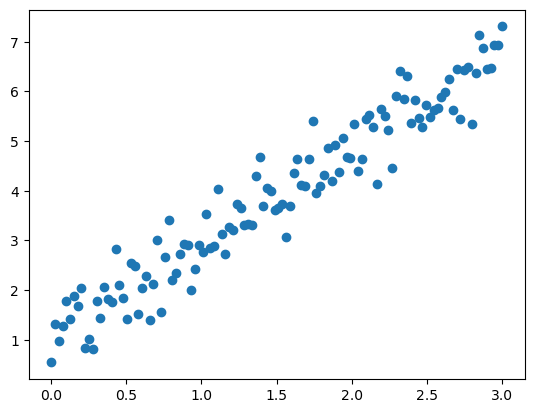

In [37]:
np.random.seed(13) # yeniden üretilebilirlik için tohumu seçin - rastgele değişimlerim etkilerini keşfetmek için değiştirin

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

Doğrusal bağlanım, $f_{W,b}(x) = Wx+b$ doğrusuyla tanımlanır, burada $W$ ve $b$ bulmamız gereken model parametreleridir. $\{x_i,y_u\}_{i=1}^N$ (**kayıp işlevi** olarak da adlandırılır) veri kümemizdeki hata, ortalama kare hatası olarak tanımlanabilir:
$$
\mathcal{L}(W,b) = {1\over N}\sum_{i=1}^N (f_{W,b}(x_i)-y_i)^2
$$

Modelimizi ve kayıp fonksiyonumuzu tanımlayalım:

In [38]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

# Bu bizim ağırlık matrisimiz
w = tf.Variable([[100.0]])
# Bu bizim ek girdi vektörümüz
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def f(x):
  return tf.matmul(x,w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

Modeli bir dizi minigrup üzerinde eğiteceğiz. Aşağıdaki formülleri kullanarak model parametrelerini ayarlayarak gradyan inişini kullanacağız:
$$
\begin{array}{l}
W^{(n+1)}=W^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial W} \\
b^{(n+1)}=b^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial b} \\
\end{array}
$$

In [39]:
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = f(x)
    loss = compute_loss(y, predictions)
    # `tape.gradient` öğesinin bir listeyle de çalıştığını unutmayın (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Eğitimi yapalım. Veri kümesinden (**dönem** olarak adlandırılan) birkaç geçiş yapacağız, onu minigruplara ayıracağız ve yukarıda tanımlanan işlevi çağıracağız:

In [40]:
# Verileri karıştırın.
indices = np.random.permutation(len(train_x))
features = tf.constant(train_x[indices],dtype=tf.float32)
labels = tf.constant(train_labels[indices],dtype=tf.float32)

In [41]:
batch_size = 4
for epoch in range(10):
  for i in range(0,len(features),batch_size):
    loss = train_on_batch(tf.reshape(features[i:i+batch_size],(-1,1)),tf.reshape(labels[i:i+batch_size],(-1,1)))
  print('Dönem %d: son toplu iş kaybı = %.4f' % (epoch, float(loss)))

Dönem 0: son toplu iş kaybı = 94.5247
Dönem 1: son toplu iş kaybı = 9.3428
Dönem 2: son toplu iş kaybı = 1.4166
Dönem 3: son toplu iş kaybı = 0.5224
Dönem 4: son toplu iş kaybı = 0.3807
Dönem 5: son toplu iş kaybı = 0.3495
Dönem 6: son toplu iş kaybı = 0.3413
Dönem 7: son toplu iş kaybı = 0.3390
Dönem 8: son toplu iş kaybı = 0.3384
Dönem 9: son toplu iş kaybı = 0.3382


Artık optimize edilmiş $W$ ve $b$ parametrelerini elde ettik. Değerlerinin, veri kümesi oluşturulurken kullanılan orijinal değerlere benzer olduğuna dikkat edin ($W=2, b=1$)

In [42]:
w,b

(<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.8616778]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0710956], dtype=float32)>)

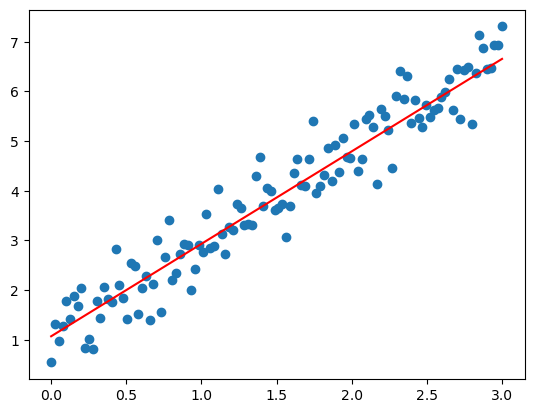

In [43]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
y = w.numpy()[0,0]*x+b.numpy()[0]
plt.plot(x,y,color='red')

## Hesaplamalı Çizge ve GPU Hesaplamaları

Tensör ifadesini her hesapladığımızda, Tensorflow, mevcut bilgi işlem cihazında, CPU veya GPU, hesaplanabilen bir hesaplamalı çizge oluşturur. Kodumuzda keyfi Python işlevi kullandığımız için, bunlar hesaplamalı çizgenin bir parçası olarak dahil edilemezler ve bu nedenle kodumuzu GPU'da çalıştırırken verileri CPU ve GPU arasında ileri geri iletmemiz ve CPU'da özelleştirilmiş işlevi hesaplamamız gerekir.

Tensorflow, Python işlevimizi, bu işlevi aynı hesaplamalı çizgenin bir parçası yapacak olan `@tf.function` dekoratörünü kullanarak işaretlememizi sağlar. Bu dekoratör, standart Tensorflow tensör işlemlerini kullanan işlevlere uygulanabilir.

In [44]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = f(x)
    loss = compute_loss(y, predictions)
    # `tape.gradient` öğesinin bir listeyle de çalıştığını unutmayın (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Kod değişmedi, ancak bu kodu GPU'da ve daha büyük veri kümesinde çalıştırıyor olsaydınız, hızdaki farkı fark ederdiniz.

## Veri Kümesi API'si

Tensorflow, verilerle çalışmak için uygun bir API içerir. Kullanmaya çalışalım. Modelimizi de sıfırdan eğiteceğiz.

In [45]:
w.assign([[10.0]])
b.assign([0.0])

# Kolay toplu yineleme için bir tf.data.Dataset nesnesi oluşturun
dataset = tf.data.Dataset.from_tensor_slices((train_x.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(tf.reshape(x,(-1,1)), tf.reshape(y,(-1,1)))
  print('Dönem %d: son toplu iş kaybı = %.4f' % (epoch, float(loss)))

Dönem 0: son toplu iş kaybı = 173.4585
Dönem 1: son toplu iş kaybı = 13.8459
Dönem 2: son toplu iş kaybı = 4.5407
Dönem 3: son toplu iş kaybı = 3.7364
Dönem 4: son toplu iş kaybı = 3.4334
Dönem 5: son toplu iş kaybı = 3.1790
Dönem 6: son toplu iş kaybı = 2.9458
Dönem 7: son toplu iş kaybı = 2.7311
Dönem 8: son toplu iş kaybı = 2.5332
Dönem 9: son toplu iş kaybı = 2.3508


2022-11-06 18:27:07.717288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Örnek 2: Sınıflandırma

Şimdi ikili sınıflandırma problemini ele alacağız. Böyle bir soruna iyi bir örnek, boyutuna ve yaşına göre habis ve iyi huylu arasında bir tümör sınıflandırması olabilir.

Çekirdek model bağlanıma benzer, ancak farklı kayıp işlevi kullanmamız gerekiyor. Örnek veriler üreterek başlayalım:


In [46]:
np.random.seed(0) # yeniden üretilebilirlik için tohumu seçin - rastgele değişimlerin etkilerini keşfetmek için değiştirin

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.05,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)

In [47]:
def plot_dataset(features, labels, W=None, b=None):
    # çizimi hazırla
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (öznitelik 1)')
    ax.set_ylabel('$x_i[1]$ -- (öznitelik 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

/var/folders/_l/jnklp1bj4cl95rc01tf5vx4h0000gn/T/ipykernel_36985/2482543244.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


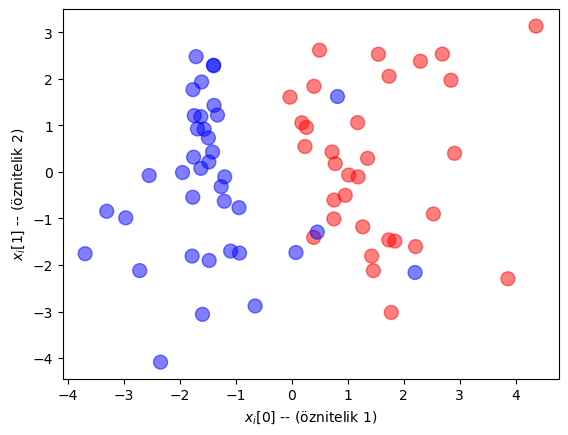

In [48]:
plot_dataset(train_x, train_labels)

## Verileri Normalleştirme

Eğitimden önce, girdi özniteliklerimizi [0,1] (veya [-1,1]) standart aralığına getirmek yaygındır. Bunun kesin nedenlerini dersin ilerleyen kısımlarında tartışacağız, ancak kısaca nedeni şudur. Ağımız üzerinden akan değerlerin çok büyük veya çok küçük olmasını önlemek istiyoruz ve normalde küçük aralıktaki tüm değerleri 0'a yakın tutmayı kabul ediyoruz. Böylece ağırlıkları küçük rastgele sayılarla ilkliyoruz ve sinyalleri aynı aralıkta tutuyoruz.

Verileri normalleştirirken en küçük değeri çıkarmamız ve aralık boyuna bölmemiz gerekiyor. Eğitim verilerini kullanarak minimum değeri ve aralığı hesaplıyoruz ve ardından eğitim kümesindeki aynı minimum/aralık değerlerini kullanarak test/geçerleme veri kümesini normalleştiriyoruz. Bunun nedeni, gerçek hayatta ağın tahmin etmesi istenecek tüm gelen yeni değerleri değil sadece eğitim kümesini bileceğiz. Bazen yeni değerler [0,1] aralığının dışına çıkabilir, ancak bu çok önemli değildir.

In [49]:
train_x_norm = (train_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))
valid_x_norm = (valid_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))
test_x_norm = (test_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))

## Tek Katmanlı Algılayıcı Eğitme

Tek katmanlı algılayıcıyı eğitmek için Tensorflow gradyan hesaplama araçlarını kullanalım.

Sinir ağımızın 2 girdisi ve 1 çıktısı olacaktır. $W$ ağırlık matrisinin boyutu $2\times1$ ve ek girdi vektörü $b$ -- $1$ olacaktır.

Çekirdek model önceki örnektekiyle aynı olacaktır, ancak kayıp fonksiyonu lojistik kayıp olacaktır. Lojistik kaybı uygulamak için, ağımızın çıktısı olarak **olasılık** değerini almamız gerekiyor, yani `sigmoid` etkinleştirme işlevini kullanarak $z$ çıktısını [0,1] aralığına getirmemiz gerekiyor: $ p=\sigma(z)$.

Gerçek $y_i\in\{0,1\}$ sınıfına karşılık gelen i. girdi değeri için $p_i$ olasılığını alırsak, kaybı $\mathcal{L_i}=-(y_i\log p_i + (1-y_i)log(1-p_i))$ olarak hesaplarız.

Tensorflow'da, bu adımların her ikisi de (sigmoid ve ardından lojistik kayıp uygulamak), `sigmoid_cross_entropy_with_logits` işlevine bir çağrı kullanılarak yapılabilir. Ağımızı minigruplar halinde eğittiğimiz için, `reduce_mean` kullanarak bir minigrubun tüm öğelerindeki kaybın ortalamasını almamız gerekiyor:

In [50]:
W = tf.Variable(tf.random.normal(shape=(2,1)),dtype=tf.float32)
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

learning_rate = 0.1

@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    z = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=z))
  dloss_dw, dloss_db = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

16 elemandan oluşan minigrupları kullanacağız ve birkaç dönemlik eğitim yapacağız:

In [51]:
# Kolay toplu yineleme için bir tf.data.Dataset nesnesi oluşturun
dataset = tf.data.Dataset.from_tensor_slices((train_x_norm.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(128).batch(2)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, tf.expand_dims(y,1))
  print('Dönem %d: son toplu iş kaybı = %.4f' % (epoch, float(loss)))

2022-11-06 18:27:07.945330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Dönem 0: son toplu iş kaybı = 0.6366
Dönem 1: son toplu iş kaybı = 0.7524
Dönem 2: son toplu iş kaybı = 0.7179
Dönem 3: son toplu iş kaybı = 0.6107
Dönem 4: son toplu iş kaybı = 0.6817
Dönem 5: son toplu iş kaybı = 0.6261
Dönem 6: son toplu iş kaybı = 0.6710
Dönem 7: son toplu iş kaybı = 0.5960
Dönem 8: son toplu iş kaybı = 0.6175
Dönem 9: son toplu iş kaybı = 0.5421


Eğitimimizin işe yaradığından emin olmak için iki sınıfı ayıran doğruyu çizelim. Ayırma doğrusu $W\times x + b = 0.5$ denklemiyle tanımlanır.

/var/folders/_l/jnklp1bj4cl95rc01tf5vx4h0000gn/T/ipykernel_36985/2482543244.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


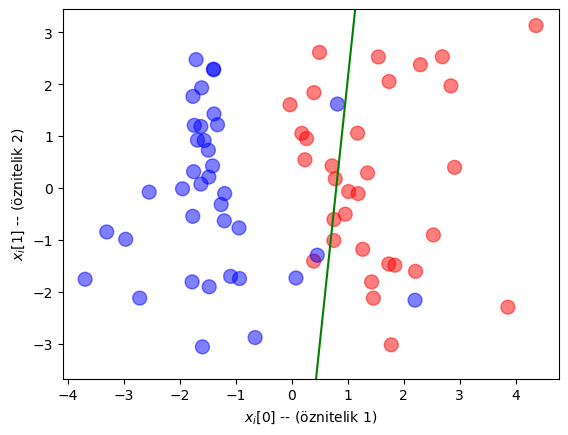

In [52]:
plot_dataset(train_x,train_labels,W.numpy(),b.numpy())

Modelimizin geçerleme verileri üzerinde nasıl davrandığını görelim.

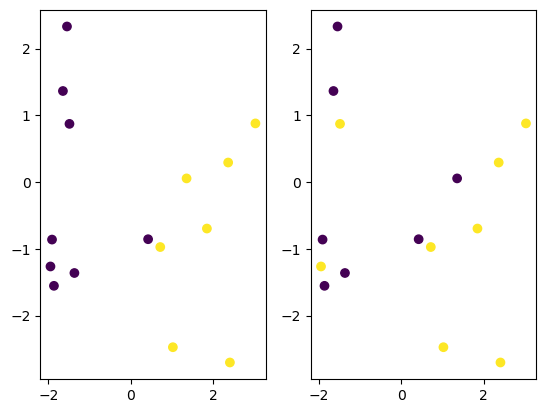

In [53]:
pred = tf.matmul(test_x,W)+b
fig,ax = plt.subplots(1,2)
ax[0].scatter(test_x[:,0],test_x[:,1],c=pred[:,0]>0.5)
ax[1].scatter(test_x[:,0],test_x[:,1],c=valid_labels)

Geçerleme verilerinin doğruluğunu hesaplamak için boole (boolean) türünü float (kayan virgüllü sayı) türüne çevirebilir ve ortalamayı hesaplayabiliriz:

In [54]:
tf.reduce_mean(tf.cast(((pred[0]>0.5)==test_labels),tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.4666667>

Burada neler olduğunu açıklayalım:
* `pred`, ağ tarafından tahmin edilen değerlerdir. Tam olasılık değiller, çünkü bir etkinleştirme işlevi kullanmadık, ancak 0.5'ten büyük değerler sınıf 1'e ve daha küçük değerler sınıf 0'a karşılık gelir.
* `pred[0]>0.5`, sonuçların bir boole tensörünü oluşturur; burada `True` sınıf 1'e ve `False` - sınıf 0'a karşılık gelir.
* Bu tensörü, `True` doğru tahmine ve `False` yanlış olana karşılık gelen beklenen boole vektörünü veya doğru tahminleri elde ederek, `valid_labels` (geçerli etiketler) etiketleriyle karşılaştırırız.
* `tf.cast` kullanarak bu tensörü kayan virgüllü sayıya dönüştürüyoruz.
* Daha sonra ortalama değeri `tf.reduce_mean` kullanarak hesaplarız - bu tam olarak bizim istediğimiz doğruluktur.

## TensorFlow/Keras Optimize Edicileri Kullanma

Tensorflow, birçok kullanışlı işlevsellik içeren Keras ile yakından tümleştirilmiştir. Örneğin, farklı **eniyileme (optimizasyon) algoritmaları** kullanabiliriz. Bunu yapalım ve ayrıca eğitim sırasında elde edilen doğruluğu yazdıralım.

In [55]:
optimizer = tf.keras.optimizers.Adam(0.01)

W = tf.Variable(tf.random.normal(shape=(2,1)))
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

@tf.function
def train_on_batch(x, y):
  vars = [W, b]
  with tf.GradientTape() as tape:
    z = tf.sigmoid(tf.matmul(x, W) + b)
    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(z,y))
    correct_prediction = tf.equal(tf.round(y), tf.round(z))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    grads = tape.gradient(loss, vars)
    optimizer.apply_gradients(zip(grads,vars))
  return loss,acc

for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss,acc = train_on_batch(tf.reshape(x,(-1,2)), tf.reshape(y,(-1,1)))
  print('Dönem %d: son toplu iş kaybı = %.4f, acc = %.4f' % (epoch, float(loss),acc))

2022-11-06 18:27:09.139136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Dönem 0: son topluiş kaybı = 7.6350, acc = 0.5000
Dönem 1: son topluiş kaybı = 7.5484, acc = 0.5000
Dönem 2: son topluiş kaybı = 7.4980, acc = 1.0000
Dönem 3: son topluiş kaybı = 7.1606, acc = 1.0000
Dönem 4: son topluiş kaybı = 7.3958, acc = 1.0000
Dönem 5: son topluiş kaybı = 7.6092, acc = 0.5000
Dönem 6: son topluiş kaybı = 7.5016, acc = 0.5000
Dönem 7: son topluiş kaybı = 6.5573, acc = 1.0000
Dönem 8: son topluiş kaybı = 8.2018, acc = 0.5000
Dönem 9: son topluiş kaybı = 6.9698, acc = 1.0000
Dönem 10: son topluiş kaybı = 6.9775, acc = 1.0000
Dönem 11: son topluiş kaybı = 7.1308, acc = 1.0000
Dönem 12: son topluiş kaybı = 7.2976, acc = 1.0000
Dönem 13: son topluiş kaybı = 7.2084, acc = 1.0000
Dönem 14: son topluiş kaybı = 6.7165, acc = 1.0000
Dönem 15: son topluiş kaybı = 6.5100, acc = 1.0000
Dönem 16: son topluiş kaybı = 6.8080, acc = 1.0000
Dönem 17: son topluiş kaybı = 6.1264, acc = 1.0000
Dönem 18: son topluiş kaybı = 5.5414, acc = 1.0000
Dönem 19: son topluiş kaybı = 4.6002, acc

**Görev 1**: Eğitim sırasında kayıp fonksiyonu ve eğitim ve geçerleme verileri üzerindeki doğruluk grafiklerini çizin.

**Görev 2**: Bu kodu kullanarak MNIST sınıflandırma problemini çözmeye çalışın. İpucu: Kayıp işlevi olarak `softmax_crossentropy_with_logits` veya `sparse_softmax_cross_entropy_with_logits` kullanın. İlk durumda, beklenen çıktı değerlerini *birebir kodlanmış* ve ikinci durumda, tamsayı sınıf numarası olarak beslemeniz gerekir.

## Keras
### İnsanlar için Derin Öğrenme

* Keras, başlangıçta Francois Chollet tarafından Tensorflow, CNTK ve Theano üzerinde çalışmak ve tüm alt seviye çerçeveleri birleştirmek için geliştirilmiş bir kütüphanedir. Hala Keras'ı ayrı bir kitaplık olarak kurabilirsiniz, ancak bunu yapmanız önerilmez.
* Artık Keras, Tensorflow kütüphanesinin bir parçası olarak dahil edilmiştir.
* Katmanlardan kolayca sinir ağları oluşturabilirsiniz.
* Tüm eğitimi yapmak için `fit` işlevinin yanı sıra tipik verilerle (resimler, metinler, vb.) çalışmak için birçok işlev içerir. 
* Çok sayıda örnek vardır.
* İşlevsel API ve Ardışık API içerir.

Keras, sinir ağları için daha yüksek düzeyde soyutlamalar sağlayarak, tensörler ve gradyanlar açısından değil, katmanlar, modeller ve optimize ediciler açısından çalışmamıza olanak tanır.

Keras'ın yaratıcısından Klasik Derin Öğrenme kitabına bakabilirsiniz: [Python ile Derin Öğrenme](https://www.manning.com/books/deep-learning-with-python)

### İşlevsel API

İşlevsel API'yi kullanırken, ağa **girdi**yi `keras.Input` olarak tanımlarız ve ardından bir dizi hesaplamadan geçirerek **çıktı**yı hesaplarız. Son olarak, **model**i girdiyi çıktıya dönüştüren bir nesne olarak tanımlarız.

**Model** nesnesini elde ettikten sonra şunları yapmamız gerekir:
* Kayıp işlevini ve modelimizde kullanmak istediğimiz optimize ediciyi belirterek **derlemek**, 
* Eğitim (ve muhtemelen geçerleme) verileriyle `fit` işlevini çağırarak **eğitmek**.

In [56]:
inputs = tf.keras.Input(shape=(2,))
z = tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid')(inputs)
model = tf.keras.models.Model(inputs,z)

model.compile(tf.keras.optimizers.Adam(0.1),'binary_crossentropy',['accuracy'])
model.summary()
h = model.fit(train_x_norm,train_labels,batch_size=8,epochs=15)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
7/9 [======================>.......] - ETA: 0s - loss: 0.7315 - accuracy: 0.4107

2022-11-06 18:27:11.824716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 16ms/step - loss: 0.7176 - accuracy: 0.5000
Epoch 2/15
9/9 [==============================] - 0s 8ms/step - loss: 0.6572 - accuracy: 0.7429
Epoch 3/15
9/9 [==============================] - 0s 8ms/step - loss: 0.6184 - accuracy: 0.9143
Epoch 4/15
9/9 [==============================] - 0s 9ms/step - loss: 0.5828 - accuracy: 0.9429
Epoch 5/15
9/9 [==============================] - 0s 8ms/step - loss: 0.5538 - accuracy: 0.8571
Epoch 6/15
9/9 [==============================] - 0s 9ms/step - loss: 0.5182 - accuracy: 0.9143
Epoch 7/15
9/9 [==============================] - 0s 7ms/step - loss: 0.4968 - accuracy: 0.9429
Epoch 8/15
9/9 [==============================] - 0s 6ms/step - loss: 0.4673 - accuracy: 0.9571
Epoch 9/15
9/9 [==============================] - 0s 7ms/step - loss: 0.4494 - accuracy: 0.9286
Epoch 10/15
9/9 [==============================] - 0s 7ms/step - loss: 0.4311 - accuracy: 0.9286
Epoch 11/15
9/9 [==============================] 

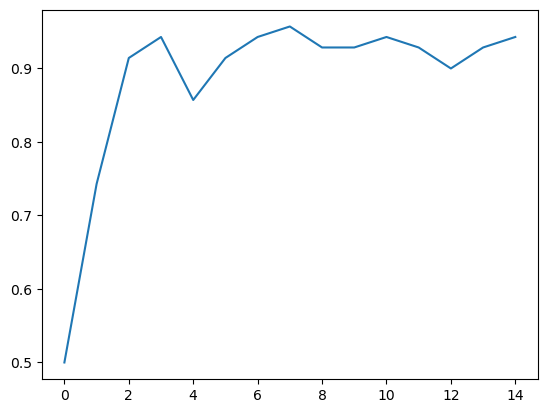

In [57]:
plt.plot(h.history['accuracy'])

### Ardışık API

Alternatif olarak, bir modeli **katmanlar dizisi** olarak düşünmeye başlayabilir ve bu katmanları `model` nesnesine ekleyerek belirtebiliriz:

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(5,activation='sigmoid',input_shape=(2,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(tf.keras.optimizers.Adam(0.1),'binary_crossentropy',['accuracy'])
model.summary()
model.fit(train_x_norm,train_labels,validation_data=(test_x_norm,test_labels),batch_size=8,epochs=15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
5/9 [===============>..............] - ETA: 0s - loss: 0.6960 - accuracy: 0.4500

2022-11-06 18:27:13.289710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 39ms/step - loss: 0.6682 - accuracy: 0.5143 - val_loss: 0.7002 - val_accuracy: 0.4667
Epoch 2/15
8/9 [=========================>....] - ETA: 0s - loss: 0.6642 - accuracy: 0.5312

2022-11-06 18:27:13.634944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 11ms/step - loss: 0.6553 - accuracy: 0.5571 - val_loss: 0.5634 - val_accuracy: 1.0000
Epoch 3/15
9/9 [==============================] - 0s 12ms/step - loss: 0.5889 - accuracy: 0.7571 - val_loss: 0.5148 - val_accuracy: 1.0000
Epoch 4/15
9/9 [==============================] - 0s 12ms/step - loss: 0.5161 - accuracy: 0.9286 - val_loss: 0.4654 - val_accuracy: 0.8667
Epoch 5/15
9/9 [==============================] - 0s 9ms/step - loss: 0.4707 - accuracy: 0.8429 - val_loss: 0.3745 - val_accuracy: 1.0000
Epoch 6/15
9/9 [==============================] - 0s 10ms/step - loss: 0.4001 - accuracy: 0.9143 - val_loss: 0.2882 - val_accuracy: 1.0000
Epoch 7/15
9/9 [==============================] - 0s 10ms/step - loss: 0.3562 - accuracy: 0.9143 - val_loss: 0.2326 - val_accuracy: 1.0000
Epoch 8/15
9/9 [==============================] - 0s 9ms/step - loss: 0.3034 - accuracy: 0.9286 - val_loss: 0.1751 - val_accuracy: 1.0000
Epoch 9/15
9/9 [========================

## Sınıflandırma Kaybı Fonksiyonları

Ağın son katmanında kayıp fonksiyonunu ve etkinleştirme fonksiyonunu doğru bir şekilde belirlemek önemlidir. Ana kurallar şunlardır:
* Ağın bir çıktısı varsa (**ikili sınıflandırma**) **sigmoid**, **çok sınıflı sınıflandırma** içinse **softmax** etkinleştirme işlevini kullanırız.
* Kayıp işlevi, çıktı sınıfı birebir kodlama olarak temsil edilirse **çapraz entropi kaybı** (kategorik çapraz entropi), çıktı sınıf numarası içeriyorsa **seyrek kategorik çapraz entropi** olacaktır. **İkili sınıflandırma** için **ikili çapraz entropi** kullanın (**logaritmik kayıp** ile aynıdır).
* **Çok etiketli sınıflandırma**, aynı anda birkaç sınıfa ait bir nesneye sahip olabileceğimiz zamandır. Bu durumda, etiketleri birebir kodlama kullanarak kodlamamız ve etkinleştirme fonksiyonu olarak **sigmoid** kullanmamız gerekir, böylece her sınıf olasılığı 0 ile 1 arasında olur.

| Sınıflandırma | Etiket Formatı | Etkinleştirme Fonksiyonu | Kayıp |
|---------------|-----------------------|-----------------|----------|
| İkili         | 1. sınıf olasılığı | sigmoid | ikili çapraz entropi |
| İkili         | Bire bir kodlama (2 çıktılı) | softmax | kategorik çapraz entropi |
| Çok sınıflı   | Bire bir kodlama | softmaks | kategorik çapraz entropi |
| Çok sınıflı   | Sınıf sayısı | softmaks | seyrek kategorik çapraz entropi |
| Çok etiketli  | Bire bir kodlama | sigmoid | kategorik çapraz entropi |

> İkili sınıflandırma, çok sınıflı sınıflandırmanın iki çıktılı özel bir durumu olarak da ele alınabilir. Bu durumda **softmax** kullanmamız gerekir.


**Görev 3**:
MNIST sınıflandırıcısını eğitmek için Keras'ı kullanın:
* Keras'ın MNIST dahil bazı standart veri kümesi içerdiğine dikkat edin. MNIST'i Keras'tan kullanmak için yalnızca birkaç satır koda ihtiyacınız vardır (daha fazla bilgi [burada](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist))
* Farklı sayıda katman/nöron, etkinleştirme işlevleriyle birkaç ağ yapılandırması deneyin.

Ulaşabildiğiniz en iyi doğruluk nedir?

## Ana Fikirler

* Tensorflow, tensörler üzerinde düşük seviyede çalışmanıza izin verir, aşırı esnekliğe sahip olursunuz.
* Veri (`td.Data`) ve katmanlar (`tf.layers`) ile çalışmak için uygun araçlar vardır.
* Yeni başlayanlar/tipik görevler için, katmanlardan ağ oluşturmaya izin veren **Keras** kullanılması önerilir.
* Standart dışı mimari gerekiyorsa kendi Keras katmanınızı uygulayabilir ve ardından Keras modellerinde kullanabilirsiniz.
* PyTorch'a da bakmak ve yaklaşımları karşılaştırmak iyi bir fikirdir.

Keras yaratıcısından Keras ve Tensorflow 2.0'nin üzerine güzel bir örnek not defterini [burada](https://t.co/k694J95PI8) bulabilirsiniz.